In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CSV files/axis_day_data.csv')
df.head()

,Unnamed: 0,date,open,high,low,close,volume
0,0,2014-01-01 00:00:00+05:30,260.30,261.00,257.64,258.44,2849424
1,1,2014-01-02 00:00:00+05:30,258.40,265.00,252.67,254.46,12972059
2,2,2014-01-03 00:00:00+05:30,251.60,253.90,249.12,252.18,12018739
3,3,2014-01-06 00:00:00+05:30,251.51,252.40,248.32,251.26,9181444
4,4,2014-01-07 00:00:00+05:30,251.50,253.16,243.10,246.85,15100309


In [ ]:
mean_data=df.iloc[:,2:4].mean(axis=1)
mean_data.head()

0    260.650
1    261.700
2    252.750
3    251.955
4    252.330
dtype: float64

In [ ]:
df['mean_data']=mean_data
dataset=df[['date','mean_data']]
dataset.head()

,date,mean_data
0,2014-01-01 00:00:00+05:30,260.650
1,2014-01-02 00:00:00+05:30,261.700
2,2014-01-03 00:00:00+05:30,252.750
3,2014-01-06 00:00:00+05:30,251.955
4,2014-01-07 00:00:00+05:30,252.330


In [ ]:
from datetime import datetime
#Removed time from date
dataset['date']=pd.to_datetime(dataset['date'])
dataset['date'] = dataset['date'].dt.date
dataset.set_index('date', inplace=True)
dataset.head()

,mean_data
date,
2014-01-01,260.650
2014-01-02,261.700
2014-01-03,252.750
2014-01-06,251.955
2014-01-07,252.330


In [ ]:
dataset.describe()

,mean_data
count,2450.000000
mean,634.394090
std,197.886387
min,222.000000
25%,496.956250
50%,590.312500
75%,752.162500
max,1171.525000


# 1. Visualize data

<Axes: xlabel='date'>

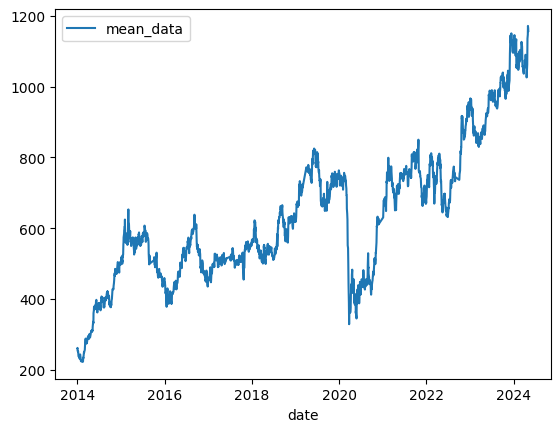

In [ ]:
dataset.plot()

# 2.Check for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(dataset['mean_data'])

In [ ]:
def adfuller_test(mean_data):
  result=adfuller(mean_data)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value) )
  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(dataset['mean_data'])

ADF Test Statistic : -1.0088904375558436
p-value : 0.7500079227195682
#Lags Used : 2
Number of Observations Used : 2447
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
# dataset['mean_data_1_diff'] = dataset['mean_data'] - dataset['mean_data'].shift(2)
dataset.head()

,mean_data
date,
2014-01-01,260.650
2014-01-02,261.700
2014-01-03,252.750
2014-01-06,251.955
2014-01-07,252.330


<Axes: xlabel='date'>

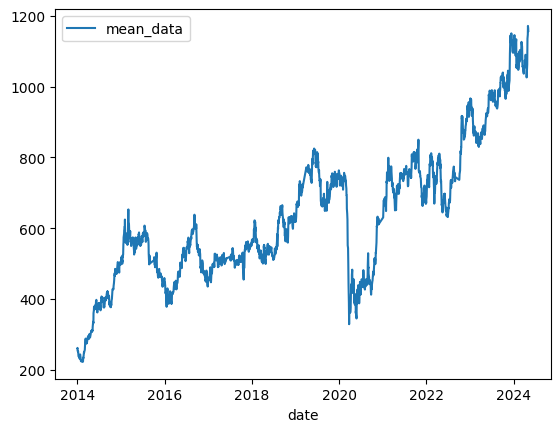

In [ ]:
dataset.plot()

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
step_wise_fit=auto_arima(dataset['mean_data'], trace=True, suppress_warnings=True)
step_wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18513.553, Time=3.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18578.205, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18511.647, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18507.962, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18579.052, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18509.573, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18509.602, Time=1.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18511.508, Time=2.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18508.081, Time=0.40 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 9.336 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2450
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -9250.981
Date:                Thu, 06 Jun 2024   AIC                          18507.962
Time:                        09:40:12   BIC                          18525.372
Sample:                             0   HQIC                         18514.289
                               - 2450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3659      0.252      1.455      0.146      -0.127       0.859
ma.L1          0.1751      0.015     11.417      0.000       0.145       0.205
sigma2       111.8412      1.715     65.212      0.000     108.480     115.203
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2518.21
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Split the dataset

In [ ]:
print(dataset.shape)
train=dataset.iloc[:-5]
test=dataset.iloc[-5:]
print(train.shape)
print(test.shape)

(2450, 1)
(2445, 1)
(5, 1)


# Train the model

In [ ]:
model=ARIMA(train['mean_data'], order=(0,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              mean_data   No. Observations:                 2445
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -9231.886
Date:                Thu, 06 Jun 2024   AIC                          18467.771
Time:                        09:40:12   BIC                          18479.374
Sample:                             0   HQIC                         18471.989
                               - 2445                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1737      0.015     11.303      0.000       0.144       0.204
sigma2       111.8141      1.714     65.220      0.000     108.454     115.174
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2536.17
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make predictions on test data

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions=model.predict(start=start, end=end, typ='levels')
# print(predictions)
predictions=dataset.iloc[start:end+1]
print(predictions)


            mean_data
date                 
2024-04-26   1135.675
2024-04-29   1147.150
2024-04-30   1171.525
2024-05-02   1165.000
2024-05-03   1157.075


<Axes: xlabel='date'>

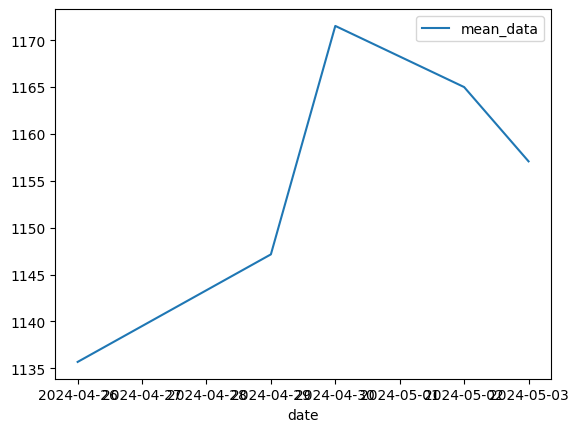

In [ ]:
predictions.plot()
test['mean_data'].plot(legend=True)